<a href="https://colab.research.google.com/github/Saul-Tlahuiz/Multivariado_T1/blob/master/Practica_1_multivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import plotly.express as px

pd.set_option('max_colwidth',100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
aplicaciones_df = pd.read_csv("aplicaciones.csv")
aplicaciones_df


,Cliente,Edad,Score,Saldo
0,15647311,41,608,8380.786
1,15619304,42,502,15966.080
2,15737888,43,850,12551.082
3,15574012,44,645,11375.578
4,15656148,29,376,11504.674
...,...,...,...,...
6378,15769959,53,597,8838.121
6379,15569266,28,644,15506.041
6380,15569892,35,516,5736.961
6381,15682355,42,772,7507.531


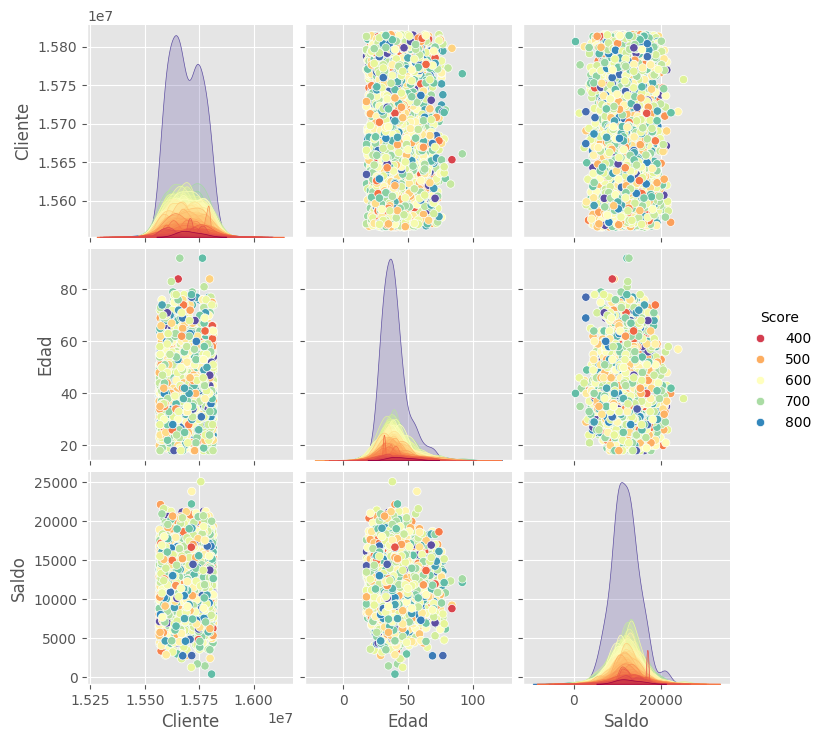

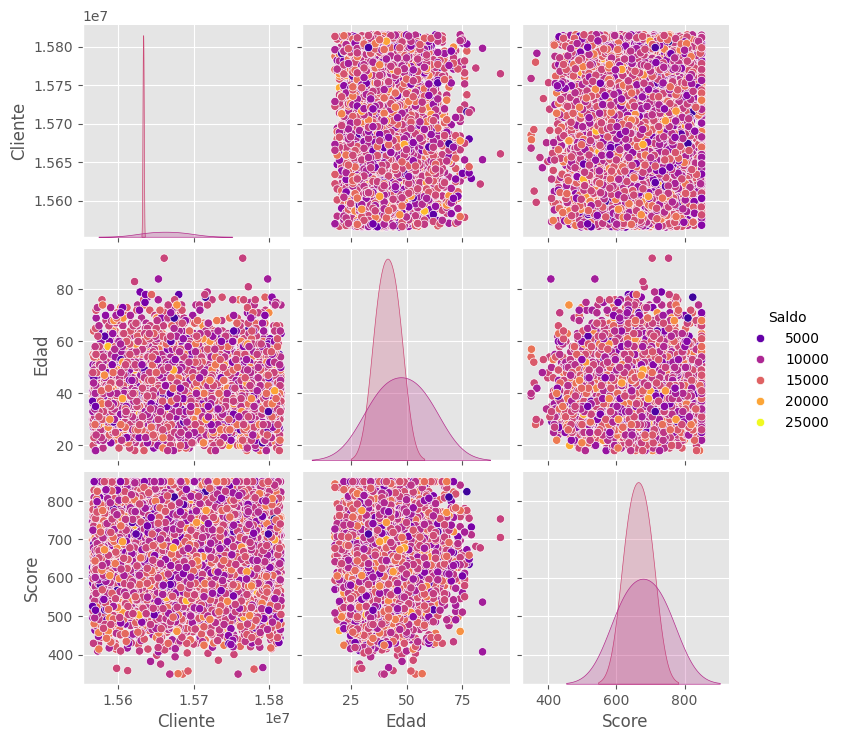

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

smp = sns.pairplot(aplicaciones_df,hue="Score",diag_kind='kde',palette="Spectral")
smp = sns.pairplot(aplicaciones_df,hue="Saldo",diag_kind='kde',palette="plasma")

Matriz de Covarianzas


,Cliente,Edad,Score,Saldo
Cliente,5.173800e+09,-4802.792437,88914.169960,-1.881076e+06
Edad,-4.802792e+03,109.750938,-9.623124,-4.042534e+02
Score,8.891417e+04,-9.623124,9396.318328,-1.383987e+03
Saldo,-1.881076e+06,-404.253438,-1383.986978,9.057124e+06


<Axes: >

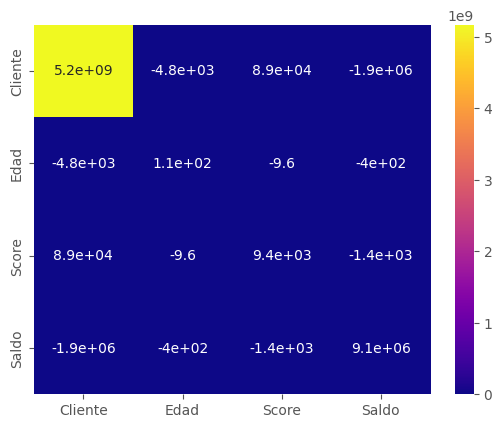

In [ ]:
#Empecemos con las estadisticas descriptivas multivariadas
features = ['Cliente','Edad','Score','Saldo']
print('Matriz de Covarianzas')
display(aplicaciones_df[features].cov())
sns.heatmap(aplicaciones_df[features].cov(),cmap="plasma", annot=True)

Matriz de Correlaciones


,Cliente,Edad,Score,Saldo
Cliente,1.000000,-0.006374,0.012752,-0.008690
Edad,-0.006374,1.000000,-0.009476,-0.012822
Score,0.012752,-0.009476,1.000000,-0.004744
Saldo,-0.008690,-0.012822,-0.004744,1.000000


<Axes: >

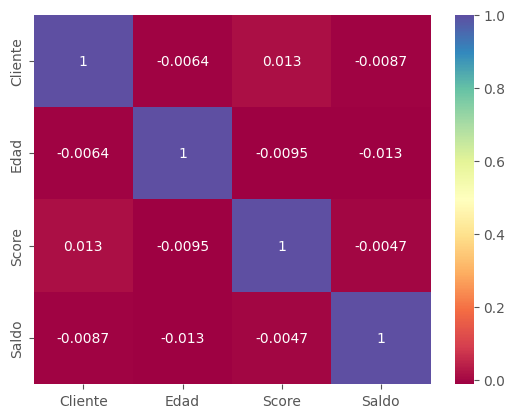

In [ ]:
print("Matriz de Correlaciones")
display(aplicaciones_df[features].corr())
sns.heatmap(aplicaciones_df[features].corr(),cmap="Spectral", annot=True)

In [ ]:
fig = px.violin(y = aplicaciones_df.Score, box = True)
fig.update_traces(fillcolor = 'green',   # Color de fondo
                  line_color = 'blue',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'red', # Color del box plot
                  opacity = 0.5)
fig.show()

In [ ]:
fig = px.violin(y = aplicaciones_df.Edad, box = True)
fig.update_traces(fillcolor = 'maroon',   # Color de fondo
                  line_color = 'blue',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'cadetblue', # Color del box plot
                  opacity = 0.5)
fig.show()

In [ ]:
fig = px.violin(y = aplicaciones_df.Saldo, box = True)
fig.update_traces(fillcolor = 'crimson',   # Color de fondo
                  line_color = 'blue',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'black', # Color del box plot
                  opacity = 0.5)
fig.show()

In [ ]:
#Lo que sigue es estandarizar nuestros datos y aplicarles las transformacion de box cox
columns = ["Cliente","Edad","Score","Saldo"]
def getStdDataMatrix(aplicaciones_df,columns,keys):
    aplicaciones_df = aplicaciones_df.copy(deep=True)
    meanVector = aplicaciones_df[columns].mean().to_dict()
    stdVector = aplicaciones_df[columns].std().to_dict()
    for col in columns:
        aplicaciones_df['std_'+col] = (aplicaciones_df[col]-meanVector[col])/stdVector[col]
    return aplicaciones_df[keys+['std_'+col for col in columns]]

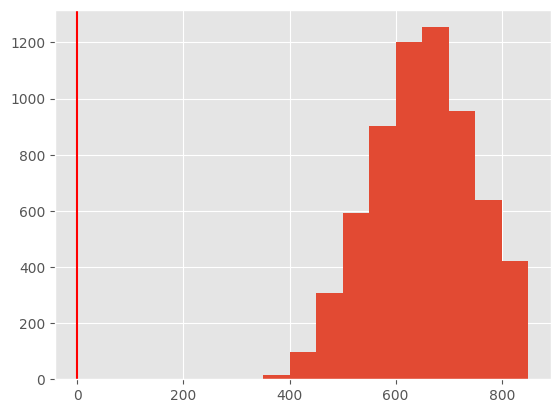

In [ ]:
plt.hist(aplicaciones_df.Score)
plt.axvline(x=0, color="r")  # verificar que también hay datos por debajo de 0
plt.show()

(array([1.000e+01, 8.200e+01, 4.180e+02, 1.255e+03, 2.089e+03, 1.647e+03,
        6.790e+02, 1.730e+02, 2.800e+01, 2.000e+00]),
 array([  376.869,  2848.163,  5319.457,  7790.751, 10262.045, 12733.339,
        15204.633, 17675.927, 20147.221, 22618.515, 25089.809]),
 <BarContainer object of 10 artists>)

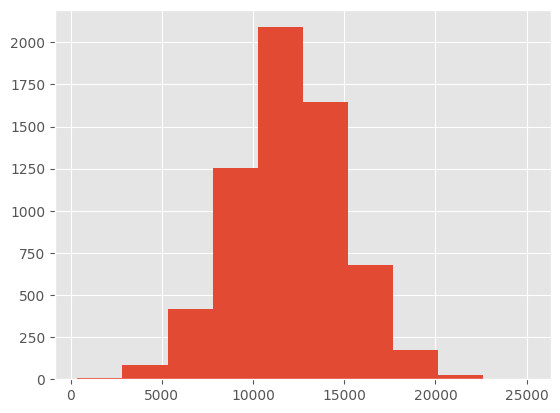

In [ ]:
plt.hist(aplicaciones_df.Saldo)

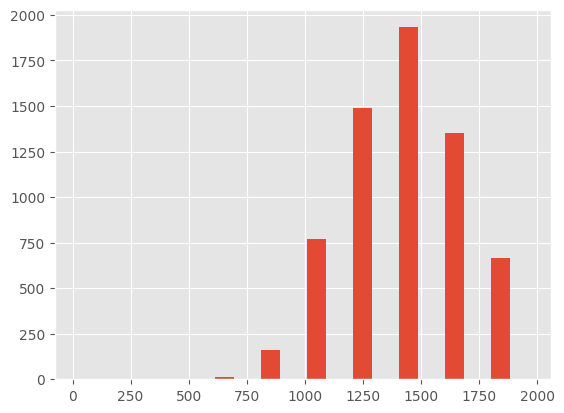

In [ ]:
from scipy.stats import yeojohnson
plt.hist(yeojohnson(aplicaciones_df.Score))
plt.show()

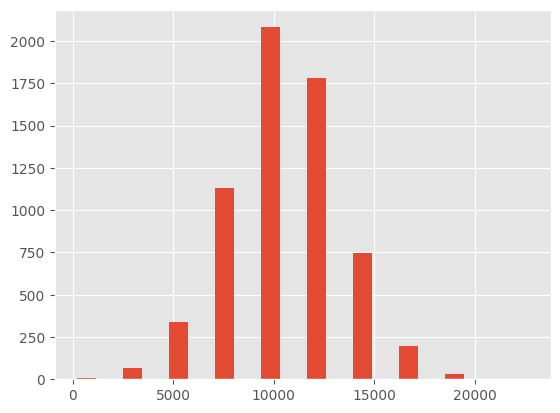

In [ ]:
from scipy.stats import yeojohnson
plt.hist(yeojohnson(aplicaciones_df.Saldo))
plt.show()

In [ ]:
transformacion_df = yeojohnson(aplicaciones_df.Saldo)
transformacion_df


(array([ 7732.54977302, 14636.33740854, 11533.53318497, ...,
         5313.34349656,  6934.47578001, 11954.83667627]),
 0.9899745872706693)

In [ ]:
transformacion_2_df = yeojohnson(aplicaciones_df.Score)
transformacion_2_df

(array([1350.83902646, 1084.92176246, 1982.23069949, ..., 1119.61066203,
        1775.43792567, 1828.1841452 ]),
 1.145541632379817)

<ipython-input-42-6366722e61ff>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aplicaciones_df, hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-42-6366722e61ff>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `

Lambda value used for Transformation: 0.9899759648810006


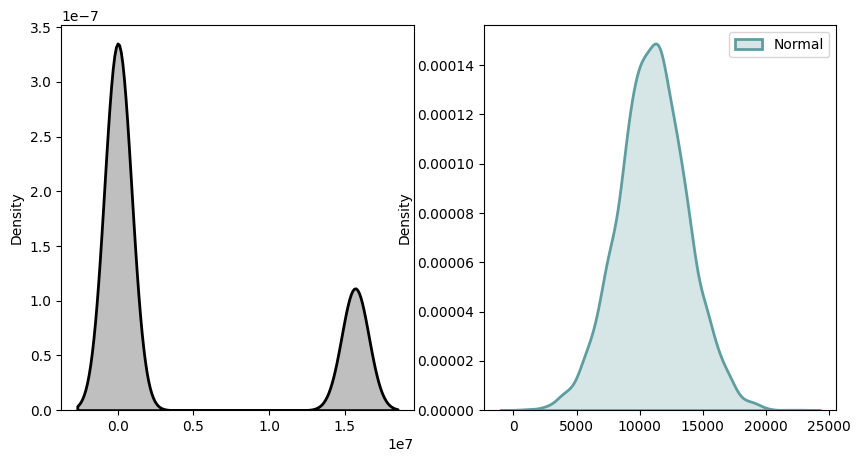

In [ ]:
from scipy import stats
import seaborn as sns
fitted_data, fitted_lambda = stats.boxcox(aplicaciones_df.Saldo)

fig, ax = plt.subplots(1, 2)

# fitted data (normal)
sns.distplot(aplicaciones_df, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="black", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="cadetblue" ,ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")

<ipython-input-43-903b095bc3fc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aplicaciones_df, hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-43-903b095bc3fc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `

Lambda value used for Transformation: 1.14521004221623


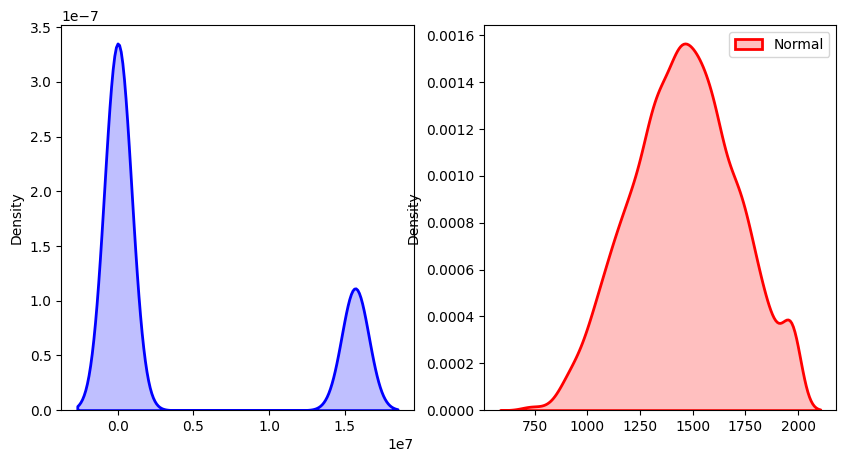

In [ ]:
fitted_data_2, fitted_lambda_2 = stats.boxcox(aplicaciones_df.Score)

fig, ax = plt.subplots(1, 2)

# fitted data (normal)
sns.distplot(aplicaciones_df, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="blue", ax = ax[0])

sns.distplot(fitted_data_2, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="red", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda_2}")

<ipython-input-44-08cb0603e4e5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aplicaciones_df, hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-44-08cb0603e4e5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `

Lambda value used for Transformation: -0.174724347768571


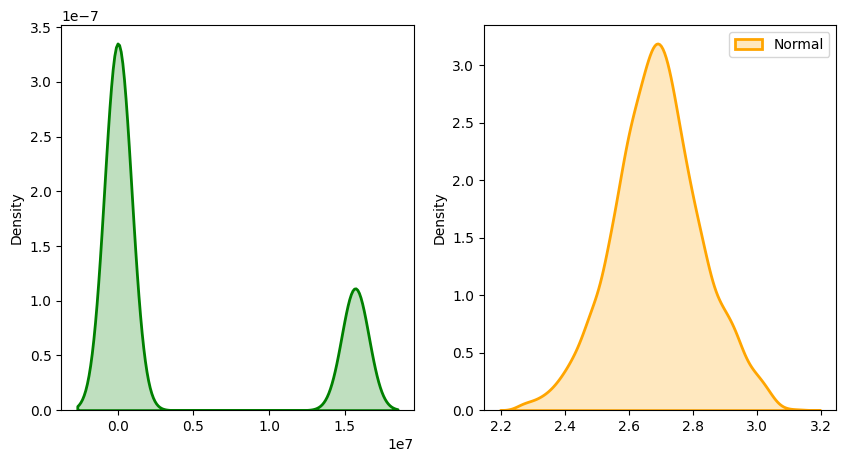

In [ ]:
fitted_data_3, fitted_lambda_3 = stats.boxcox(aplicaciones_df.Edad)

fig, ax = plt.subplots(1, 2)

# fitted data (normal)
sns.distplot(aplicaciones_df, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data_3, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="orange", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda_3}")

In [ ]:
data_1 = pd.DataFrame(fitted_data)
data_2 = pd.DataFrame(fitted_data_2)
data_3 = pd.DataFrame(fitted_data_3)

In [ ]:
from scipy import sparse

input_matrix = np.array(fitted_data)
print("The input matrix is:")
print(input_matrix)
sparse_matrix = sparse.csr_matrix(input_matrix)
print("The sparse matrix is:")
print(sparse_matrix)

The input matrix is:
[ 7731.72183357 14635.60465833 11532.75736711 ...  5312.48256515
  6933.63695979 11954.06667696]
The sparse matrix is:
  (0, 0)	7731.721833565796
  (0, 1)	14635.604658331898
  (0, 2)	11532.757367108794
  (0, 3)	10462.84218813532
  (0, 4)	10580.3944409117
  (0, 5)	13036.528529912104
  (0, 6)	12359.691122044353
  (0, 7)	9393.272960041064
  (0, 8)	13134.503464835805
  (0, 9)	12177.767208170668
  (0, 10)	12560.745071897474
  (0, 11)	12972.775495633176
  (0, 12)	5525.8541524639195
  (0, 13)	7869.074046820185
  (0, 14)	10131.023354911023
  (0, 15)	12328.795981363437
  (0, 16)	13328.082065898265
  (0, 17)	7068.346292041803
  (0, 18)	6501.3521546098655
  (0, 19)	11260.850496155748
  (0, 20)	10796.40522136151
  (0, 21)	12067.897683983723
  (0, 22)	14297.079478014206
  (0, 23)	10068.038832706505
  (0, 24)	10307.10235170044
  :	:
  (0, 6358)	7676.109581318912
  (0, 6359)	11570.070427837654
  (0, 6360)	10891.989636384975
  (0, 6361)	14079.787261901443
  (0, 6362)	13851.8387768

In [ ]:
from scipy import sparse

input_matrix_2 = np.array(fitted_data_2)
print("The input matrix is:")
print(input_matrix_2)
sparse_matrix_2 = sparse.csr_matrix(input_matrix_2)
print("The sparse matrix is:")
print(sparse_matrix_2)

The input matrix is:
[1345.82161237 1080.53054532 1975.70874245 ... 1115.1379427  1769.41177031
 1822.03181362]
The sparse matrix is:
  (0, 0)	1345.8216123702064
  (0, 1)	1080.530545318207
  (0, 2)	1975.7087424548047
  (0, 3)	1440.0832358697312
  (0, 4)	775.8134344450949
  (0, 5)	1078.0639014675864
  (0, 6)	1540.2933332669938
  (0, 7)	1144.9102921262652
  (0, 8)	1366.1336688207066
  (0, 9)	1460.5691721169048
  (0, 10)	1727.4577962041903
  (0, 11)	1259.933349972392
  (0, 12)	859.1551238878378
  (0, 13)	1157.3445962423207
  (0, 14)	1207.249973959572
  (0, 15)	1014.1857225102661
  (0, 16)	1050.9782689664885
  (0, 17)	1853.696901703558
  (0, 18)	1280.0775124052072
  (0, 19)	989.7506053371933
  (0, 20)	1214.7586479551808
  (0, 21)	1933.1583212119137
  (0, 22)	1478.5243023197197
  (0, 23)	1779.9201106051578
  (0, 24)	1919.885500004849
  :	:
  (0, 6358)	1394.1252664314616
  (0, 6359)	1023.9807937793918
  (0, 6360)	1383.938185541178
  (0, 6361)	1105.2360338499332
  (0, 6362)	1120.0930839452028

In [ ]:
from scipy import sparse

input_matrix_3 = np.array(fitted_data_3)
print("The input matrix is:")
print(input_matrix_3)
sparse_matrix_3 = sparse.csr_matrix(input_matrix_3)
print("The sparse matrix is:")
print(sparse_matrix_3)

The input matrix is:
[2.73204217 2.74461018 2.75683148 ... 2.64819339 2.74461018 2.5259313 ]
The sparse matrix is:
  (0, 0)	2.7320421737503646
  (0, 1)	2.7446101788664117
  (0, 2)	2.7568314807426444
  (0, 3)	2.7687233796434
  (0, 4)	2.545475376635014
  (0, 5)	2.7687233796434
  (0, 6)	2.5055495222805573
  (0, 7)	2.5822904150114616
  (0, 8)	2.7803019438291687
  (0, 9)	2.9079483878719152
  (0, 10)	2.6632923050135635
  (0, 11)	2.7568314807426444
  (0, 12)	2.545475376635014
  (0, 13)	2.6632923050135635
  (0, 14)	2.7320421737503646
  (0, 15)	2.7803019438291687
  (0, 16)	2.5822904150114616
  (0, 17)	2.616415546227066
  (0, 18)	2.7320421737503646
  (0, 19)	2.8439638785105377
  (0, 20)	2.932646884890695
  (0, 21)	2.8237670794373524
  (0, 22)	2.932646884890695
  (0, 23)	2.599666210933344
  (0, 24)	2.5055495222805573
  :	:
  (0, 6358)	2.616415546227066
  (0, 6359)	2.648193391599133
  (0, 6360)	2.813302114210526
  (0, 6361)	2.719108805830904
  (0, 6362)	2.7446101788664117
  (0, 6363)	2.63257899126

In [ ]:
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet
X = data_1
# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print('Estimated covariance matrix:\n'
      'MCD (Robust):\n{}\n'
      'MLE:\n{}'.format(robust_cov.covariance_, emp_cov.covariance_))

Estimated covariance matrix:
MCD (Robust):
[[6014148.78724023]]
MLE:
[[7506908.76703428]]


In [ ]:
import numpy as np
from sklearn.covariance import EllipticEnvelope

datos = np.column_stack((data_1, data_2, data_3))

envolvente = EllipticEnvelope(contamination=0.001)
envolvente.fit(datos)

# Identificar los puntos anómalos
outliers = envolvente.predict(datos)

# Imprimir los índices de los puntos anómalos
print("Índices de los puntos anómalos:")
print(np.where(outliers == -1))

Índices de los puntos anómalos:
(array([1351, 2122, 2278, 3370, 4291, 5396, 5997]),)


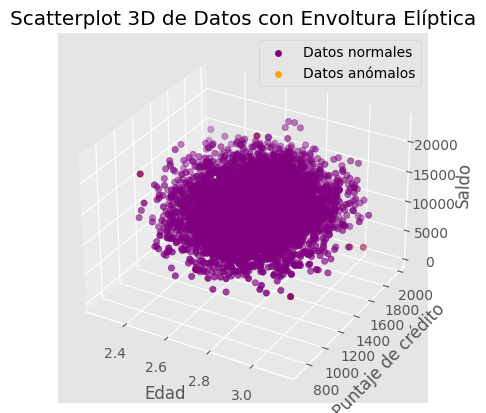

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.covariance import EllipticEnvelope

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3, data_2, data_1, c='purple', marker='o', label='Datos normales')
ax.scatter(data_3[outliers == -1], data_2[outliers == -1], data_1[outliers == -1], c = "orange", marker='o', label='Datos anómalos')
# Etiquetas de los ejes
ax.set_xlabel('Edad')
ax.set_ylabel('Puntaje de crédito')
ax.set_zlabel('Saldo')

# Título del gráfico
plt.title('Scatterplot 3D de Datos con Envoltura Elíptica')

# Mostrar la leyenda
plt.legend()

# Mostrar el scatterplot
plt.show()

[[3.54107484e+00 1.79218395e-04 3.35057648e-05]
 [1.79218395e-04 1.54328207e-06 9.74347080e-09]
 [3.35057648e-05 9.74347080e-09 6.58124920e-09]]


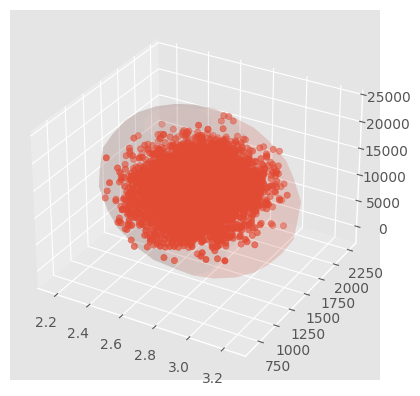

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Función mvee para calcular la envolvente elipsoidal mínima
def mvee(points, tol = 0.001):
    """
    Finds the ellipse equation in "center form"
    (x-c).T * A * (x-c) = 1
    """
    N, d = points.shape
    Q = np.column_stack((points, np.ones(N))).T
    err = tol+1.0
    u = np.ones(N)/N
    while err > tol:
        # assert u.sum() == 1 # invariant
        X = np.dot(np.dot(Q, np.diag(u)), Q.T)
        M = np.diag(np.dot(np.dot(Q.T, la.inv(X)), Q))
        jdx = np.argmax(M)
        step_size = (M[jdx]-d-1.0)/((d+1)*(M[jdx]-1.0))
        new_u = (1-step_size)*u
        new_u[jdx] += step_size
        err = la.norm(new_u-u)
        u = new_u
    c = np.dot(u,points)
    A = la.inv(np.dot(np.dot(points.T, np.diag(u)), points)
               - np.multiply.outer(c,c))/d
    return A, c

np.random.seed(42)

points = np.column_stack((data_3, data_2, data_1))

# compute mvee
A, centroid = mvee(points)
print(A)

# point it and some other stuff
U, D, V = np.linalg.svd(A)

rx, ry, rz = [1/np.sqrt(d) for d in D]
u, v = np.mgrid[0:2*np.pi:20j,-np.pi/2:np.pi/2:10j]

x = rx * np.cos(u) * np.cos(v)
y = ry * np.sin(u) * np.cos(v)
z = rz * np.sin(v)

for idx in range(x.shape[0]):
    for idy in range(y.shape[1]):
        x[idx, idy], y[idx, idy], z[idx, idy] = np.dot(np.transpose(V), np.array([x[idx, idy], y[idx, idy], z[idx, idy]])) + centroid

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2])
ax.plot_surface(x, y, z, cstride=1, rstride=1, alpha=0.1)
plt.show()

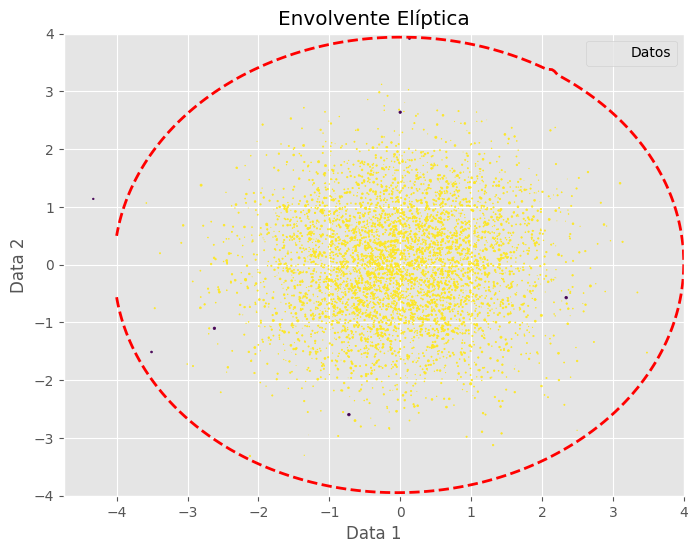

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Datos
data_1
data_2
data_3
datos = np.column_stack((data_1, data_2, data_3))

# Ajustar la envolvente elíptica
envolvente = EllipticEnvelope(contamination=0.001)
envolvente.fit(datos)

# Identificar los puntos anómalos
outliers = envolvente.predict(datos)

# Graficar la envolvente elíptica y los puntos de datos
plt.figure(figsize=(8, 6))
plt.scatter(data_1, data_2,data_3, label='Datos', c=outliers, cmap='viridis')
plt.xlabel('Data 1')
plt.ylabel('Data 2')

# Dibujar la envolvente elíptica
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
zz = envolvente.decision_function(np.c_[xx.ravel(), yy.ravel(),outliers])
zz = zz.reshape(xx.shape)
plt.contour(xx, yy,zz, levels=[0], linewidths=2, colors='red', linestyles='dashed')

plt.title('Envolvente Elíptica')
plt.legend()
plt.grid(True)
plt.show()